In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [4]:
all_data = pd.read_csv("data/all_data_m.csv")

In [5]:
all_data.iloc[5]

time                2021-01-02
time.1                       6
replies_count_t           18.0
retweets_count_t          23.0
top_tw_t                   2.0
                       ...    
open                  0.007216
high                  0.007349
low                   0.006674
tv                          -5
Volume              60681934.0
Name: 5, Length: 407, dtype: object

In [6]:
all_data["tv"].value_counts()

 0    377
 5    375
-5    330
-2    302
 2    290
 1    282
-1    264
-3    212
 3    150
 4    112
-4    104
Name: tv, dtype: int64

In [7]:
all_data = all_data.iloc[:,2:-1].apply(pd.to_numeric)

In [8]:
X = all_data.drop(columns='tv')
y = all_data['tv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [10]:
y_train["tv"].value_counts()

 5    276
 0    272
-5    229
-2    209
 1    199
 2    197
-1    179
-3    141
 3    104
 4     83
-4     69
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

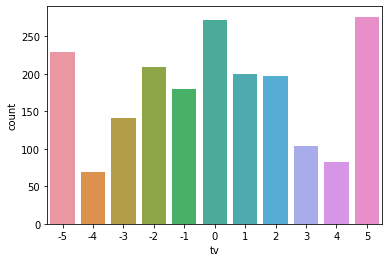

In [11]:
sns.countplot(x=y_train['tv'])

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

 0    377
 5    375
-5    330
-2    302
 2    290
 1    282
-1    264
-3    212
 3    150
 4    112
-4    104
Name: tv, dtype: int64

In [13]:
#feature filtering

from sklearn.linear_model import Lasso,Ridge,ElasticNet
model=Lasso(alpha=0.002)

model.fit(X_sm, y_sm)
print(f"{model.__class__.__name__}: Train -> {model.score(X_sm, y_sm)}, Test -> {model.score(X_test, y_test)}")


Lasso: Train -> 0.30662856793395865, Test -> -0.6011184220051657


/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+04, tolerance: 3.036e+00
  model = cd_fast.enet_coordinate_descent(


In [14]:
model=Ridge(alpha=10)
model.fit(X_sm, y_sm)
print(f"{model.__class__.__name__}: Train -> {model.score(X_sm, y_sm)}, Test -> {model.score(X_test, y_test)}")


     

Ridge: Train -> 0.30843119960153786, Test -> -0.6243317774347945


In [15]:
model=ElasticNet(alpha=0.001)
model.fit(X_sm, y_sm)
print(f"{model.__class__.__name__}: Train -> {model.score(X_sm, y_sm)}, Test -> {model.score(X_test, y_test)}")


ElasticNet: Train -> 0.31047567142528687, Test -> -0.643836175683989


/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+04, tolerance: 3.036e+00
  model = cd_fast.enet_coordinate_descent(


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rf.fit(X_sm, y_sm['tv'])

RandomForestClassifier()

In [17]:
y_train_res_pred_rf = rf.predict(X_sm)
y_test_pred_rf      = rf.predict(X_test)

In [18]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [19]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -5       1.00      1.00      1.00       276
          -4       1.00      1.00      1.00       276
          -3       1.00      1.00      1.00       276
          -2       1.00      1.00      1.00       276
          -1       1.00      1.00      1.00       276
           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00       276
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00       276
           5       1.00      1.00      1.00       276

    accuracy                           1.00      3036
   macro avg       1.00      1.00      1.00      3036
weighted avg       1.00      1.00      1.00      3036

Results obtained for the TEST SET
The Cohen's Kappa is: 0.06
              precision    recall  f1-score   support

         